In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import userinput

if userinput.Depth_drilling_possible:
    folder = "optimization_2_results_capmax_depth"
else:
    folder = "optimization_2_results_capmax"
csv_files = [f for f in os.listdir(folder) if f.endswith('.csv')]

In [2]:
all_dfs = pd.DataFrame(columns=['name', 'phi_standing', 'electricity_price', 'drilling_costs', 'Capex_TTES', 'objective_value', 'total_heat_supplied', 'costs_per_MWh'])


for f in csv_files:
    name = f
    f = pd.read_csv(os.path.join(folder, f))

    df_aux = pd.DataFrame({
        'name': [name],
        'phi_standing': [f['phi_standing'].iloc[0]],
        'electricity_price': [f['electricity_price'].iloc[0]],
        'drilling_costs': [f['drilling_costs'].iloc[0]],
        'Capex_TTES': [f['Capex_TTES'].iloc[0]],
        'objective_value': [f['objective_value'].iloc[0]],
        'total_heat_supplied': [f['total_heat_supplied'].iloc[0]],
        'costs_per_MWh_produced': [f['costs_per_MWh_produced'].iloc[0]],
        'costs_per_MWh_demand': [f['costs_per_MWh_demand'].iloc[0]],
    })
    all_dfs = pd.concat([all_dfs, df_aux], ignore_index=True)


grouped = all_dfs.groupby(['phi_standing', 'electricity_price'])

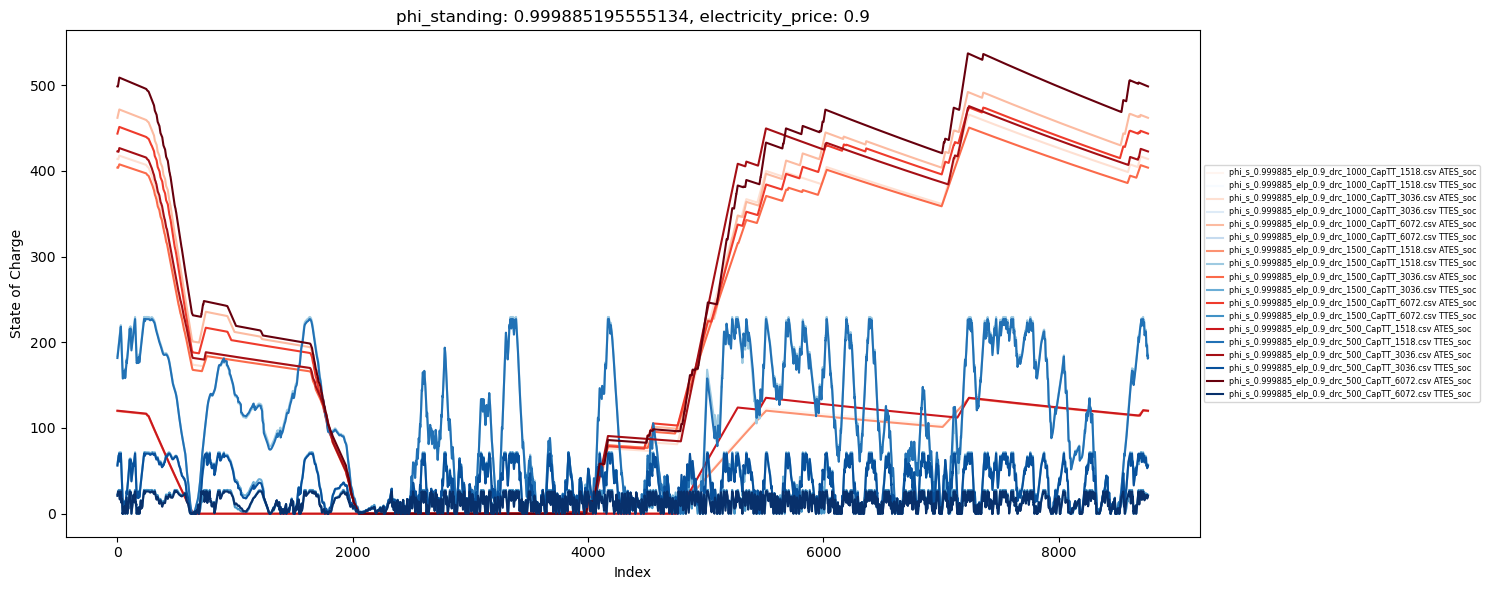

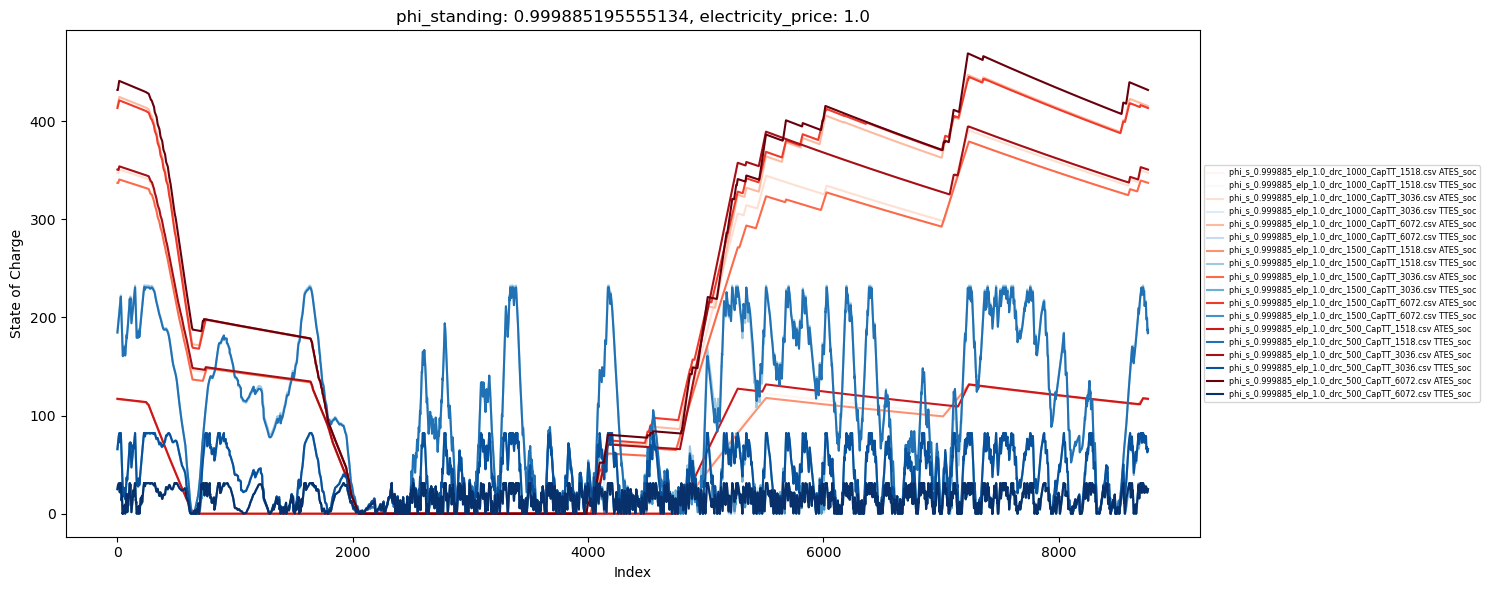

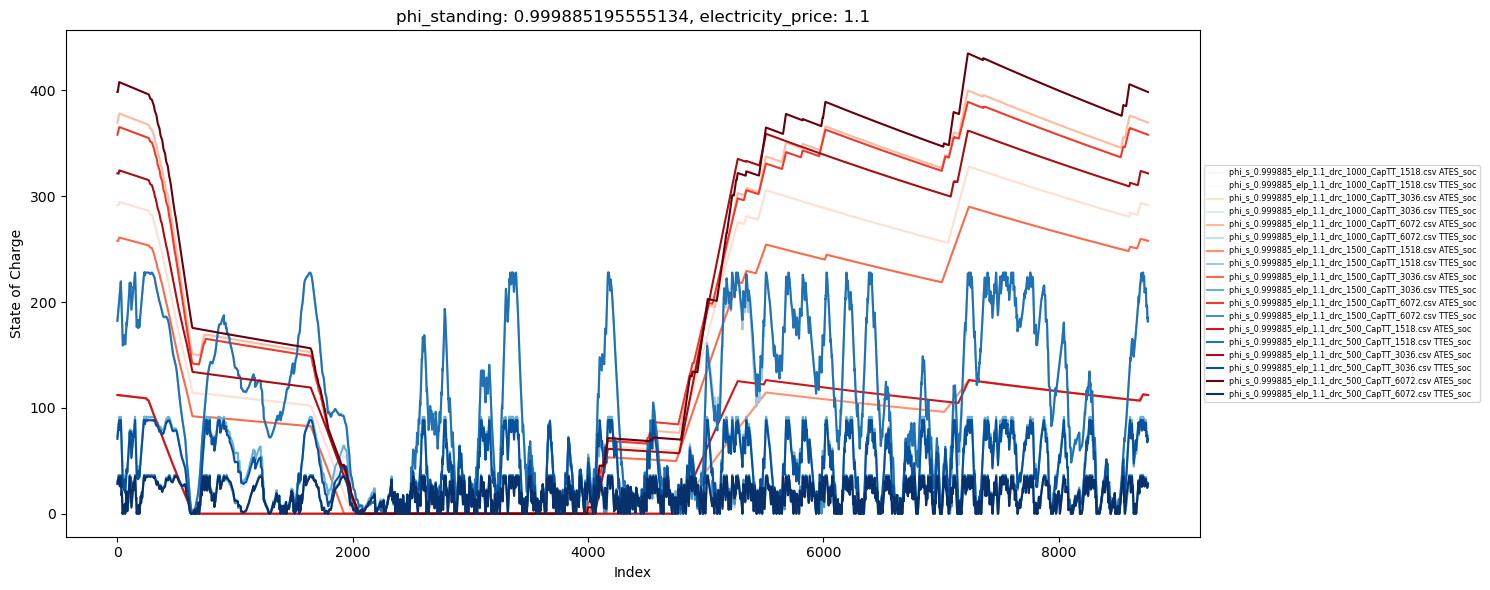

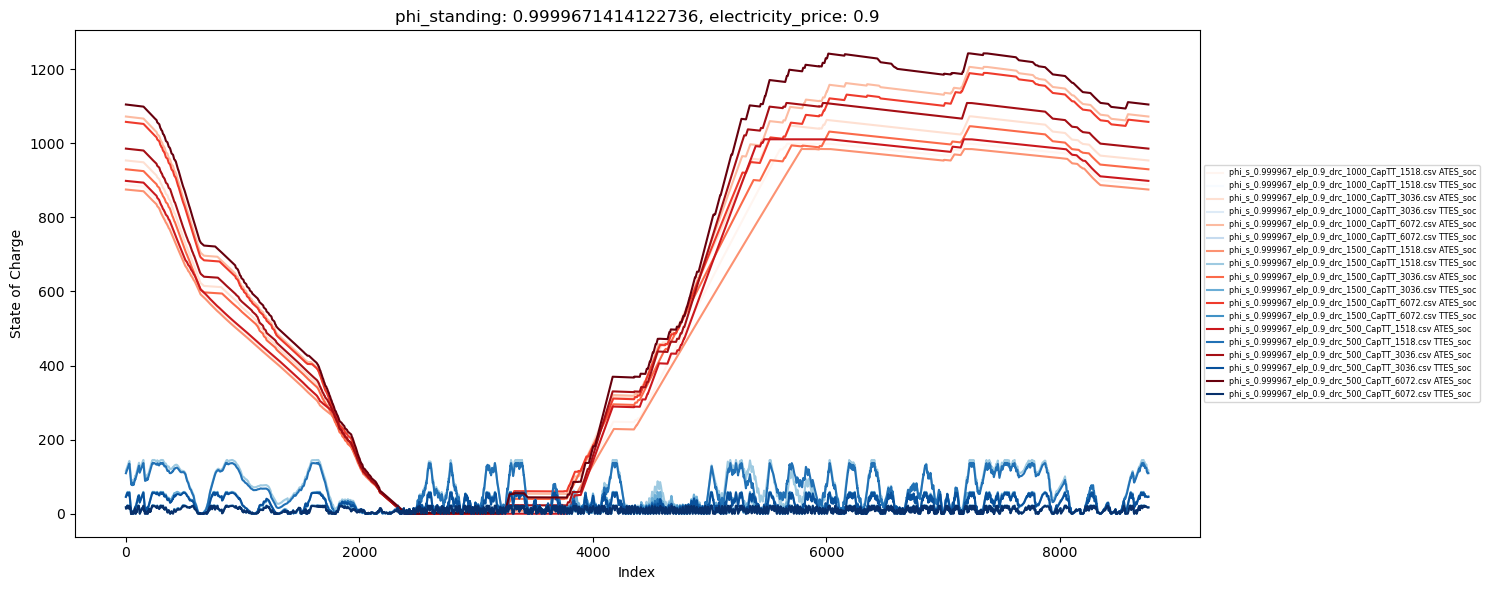

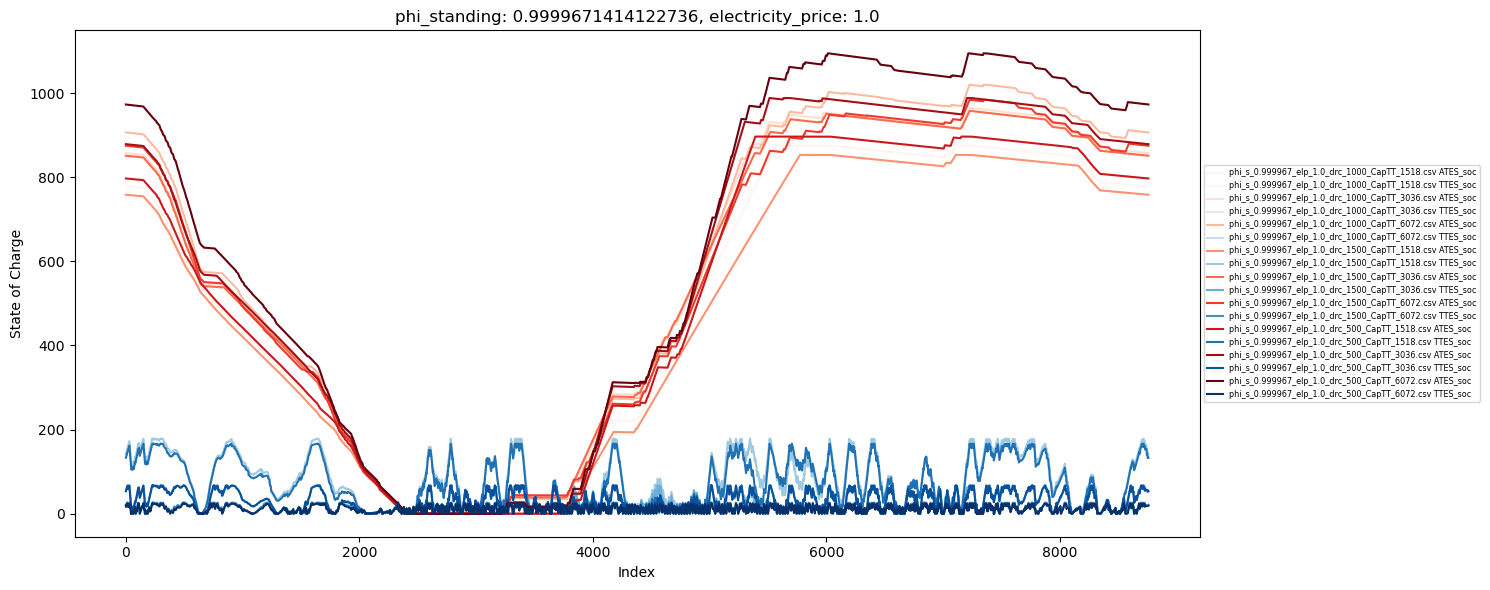

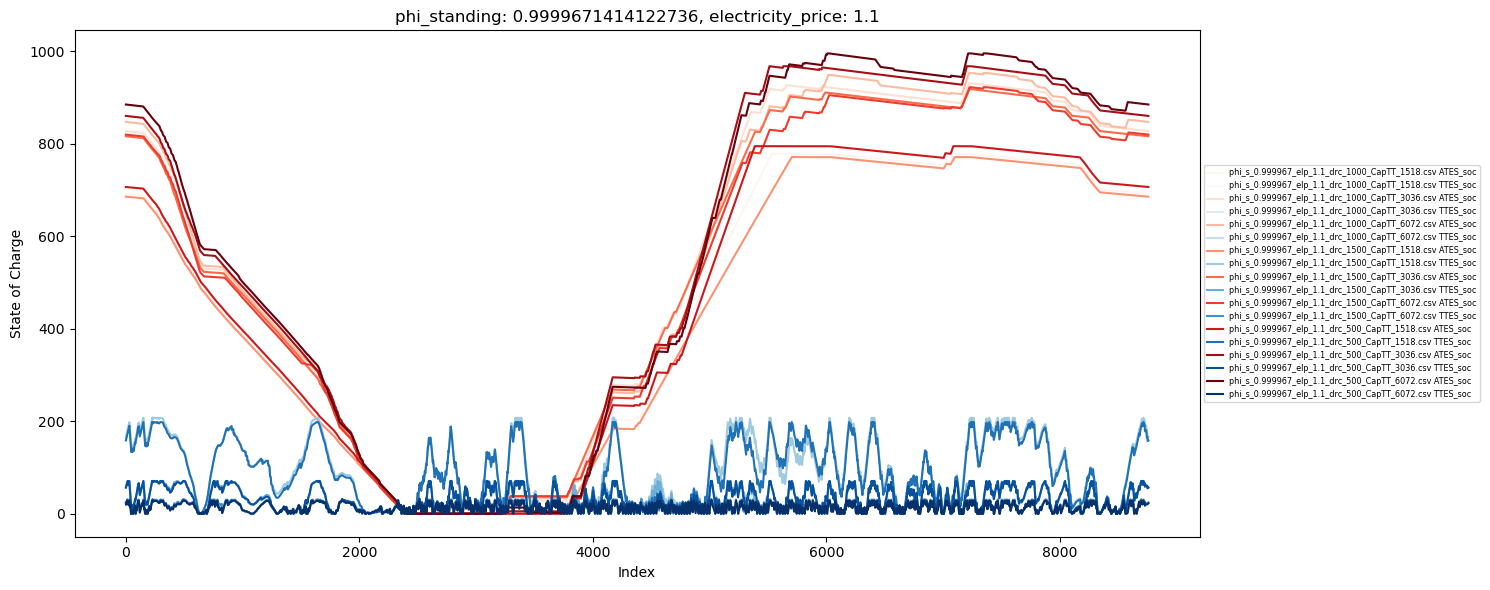

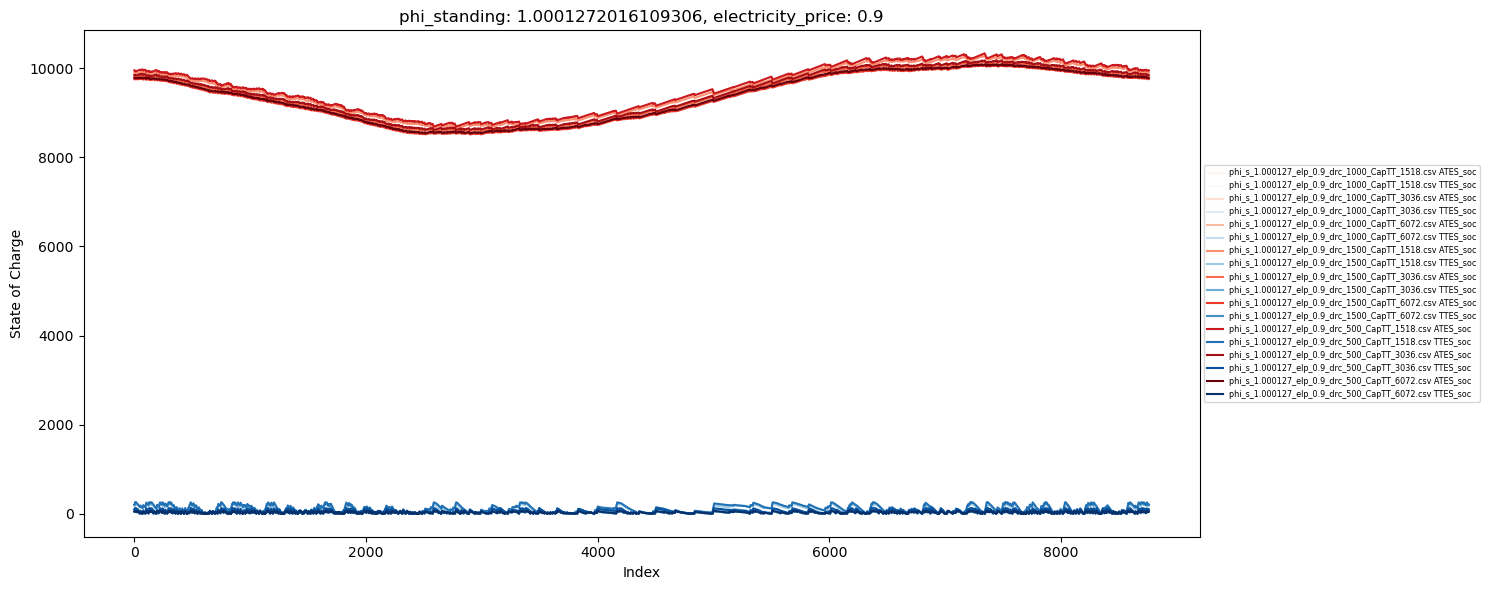

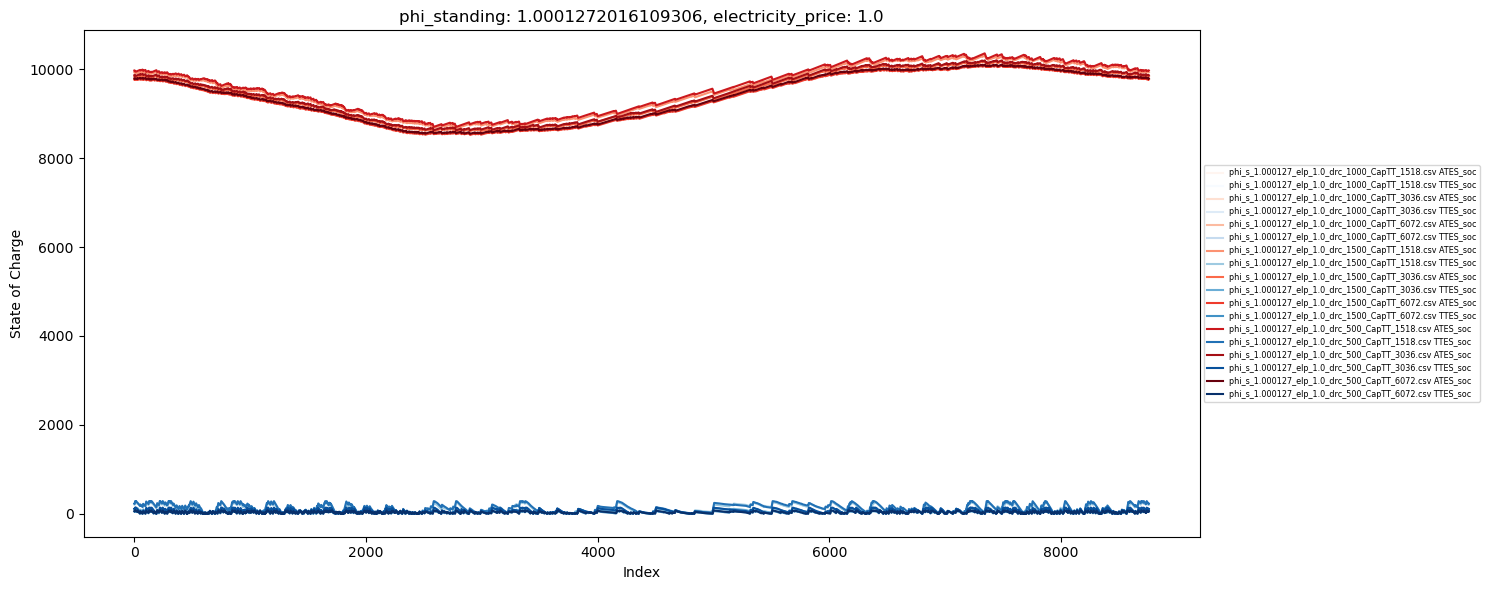

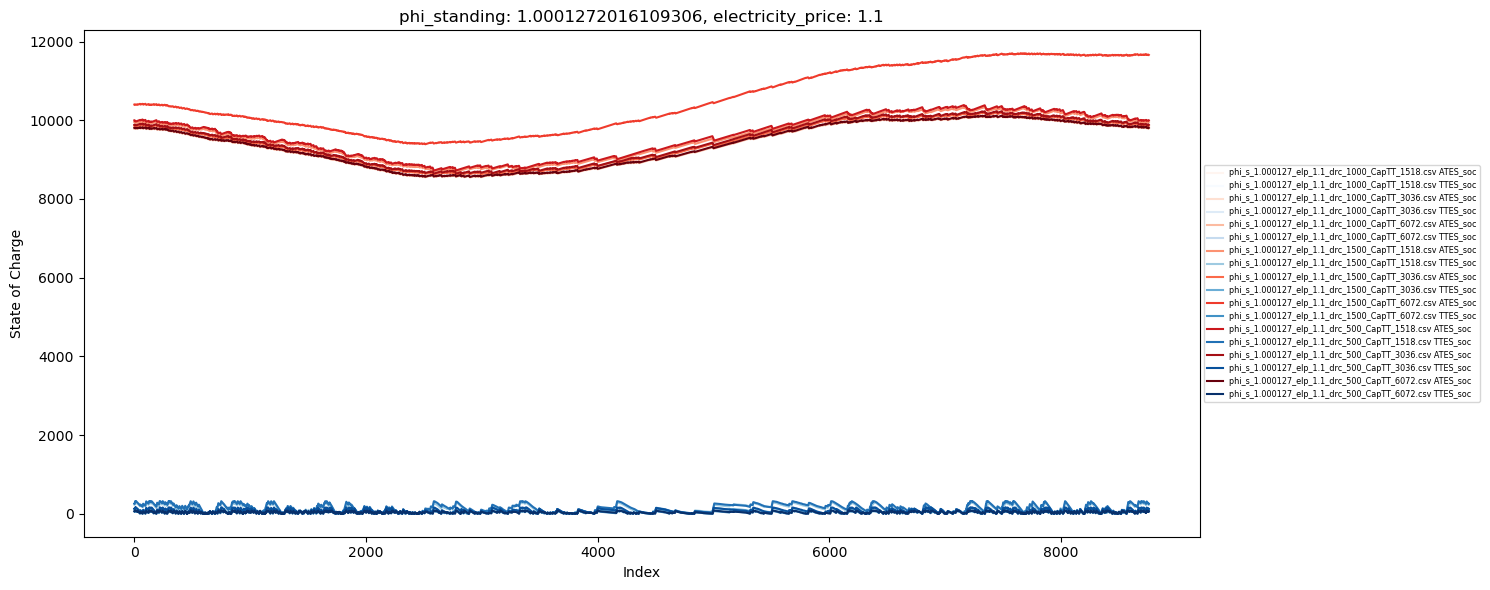

In [3]:
for idx, ((phi, price), group) in enumerate(grouped):
    num_group_files = len(all_dfs[(all_dfs['phi_standing'] == phi) & (all_dfs['electricity_price'] == price)])

    red_cmap = matplotlib.colormaps['Reds'].resampled(num_group_files)
    blue_cmap = matplotlib.colormaps['Blues'].resampled(num_group_files)

    plt.figure(figsize=(15, 6))
    handles = []
    labels = []
    color_idx = 0
    for fname in group['name']:
        df_path = os.path.join(folder, fname)
        df = pd.read_csv(df_path)
        h1, = plt.plot(df['ATES_soc'], color=red_cmap(color_idx), label=f'{fname} ATES_soc')
        h2, = plt.plot(df['TTES_soc'], color=blue_cmap(color_idx), label=f'{fname} TTES_soc')
        handles.extend([h1, h2])
        labels.extend([f'{fname} ATES_soc', f'{fname} TTES_soc'])
        color_idx += 1
    plt.title(f'phi_standing: {phi}, electricity_price: {price}')
    plt.xlabel('Index')
    plt.ylabel('State of Charge')
    #plt.ylim(0, 7500)
    plt.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5), fontsize='xx-small')
    plt.tight_layout()
    plt.show()

In [4]:
all_dfs.columns

Index(['name', 'phi_standing', 'electricity_price', 'drilling_costs',
       'Capex_TTES', 'objective_value', 'total_heat_supplied', 'costs_per_MWh',
       'costs_per_MWh_produced', 'costs_per_MWh_demand'],
      dtype='object')